# Project – Resume Classification

## Business objective- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data=pd.read_csv('UpdatedResumeDataSet.csv.zip')

In [3]:
data

Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]

In [4]:
data.shape

(962, 2)

In [5]:
data.size

1924

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
data['len']= data['Resume'].apply(len)

In [8]:
data

Category                                             Resume   len
0    Data Science  Skills * Programming Languages: Python (pandas...  4786
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...  1268
2    Data Science  Areas of Interest Deep Learning, Control Syste...  1871
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...  6995
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   452
..            ...                                                ...   ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...  2130
958       Testing  â Willingness to accept the challenges. â ...  2306
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...  3319
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   767
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...  1955

[962 rows x 3 columns]

In [9]:
data.describe()

len
count    962.000000
mean    3160.364865
std     2886.528521
min      142.000000
25%     1217.250000
50%     2355.000000
75%     4073.750000
max    14816.000000

In [10]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

# Visualization

<Axes: xlabel='count', ylabel='Category'>

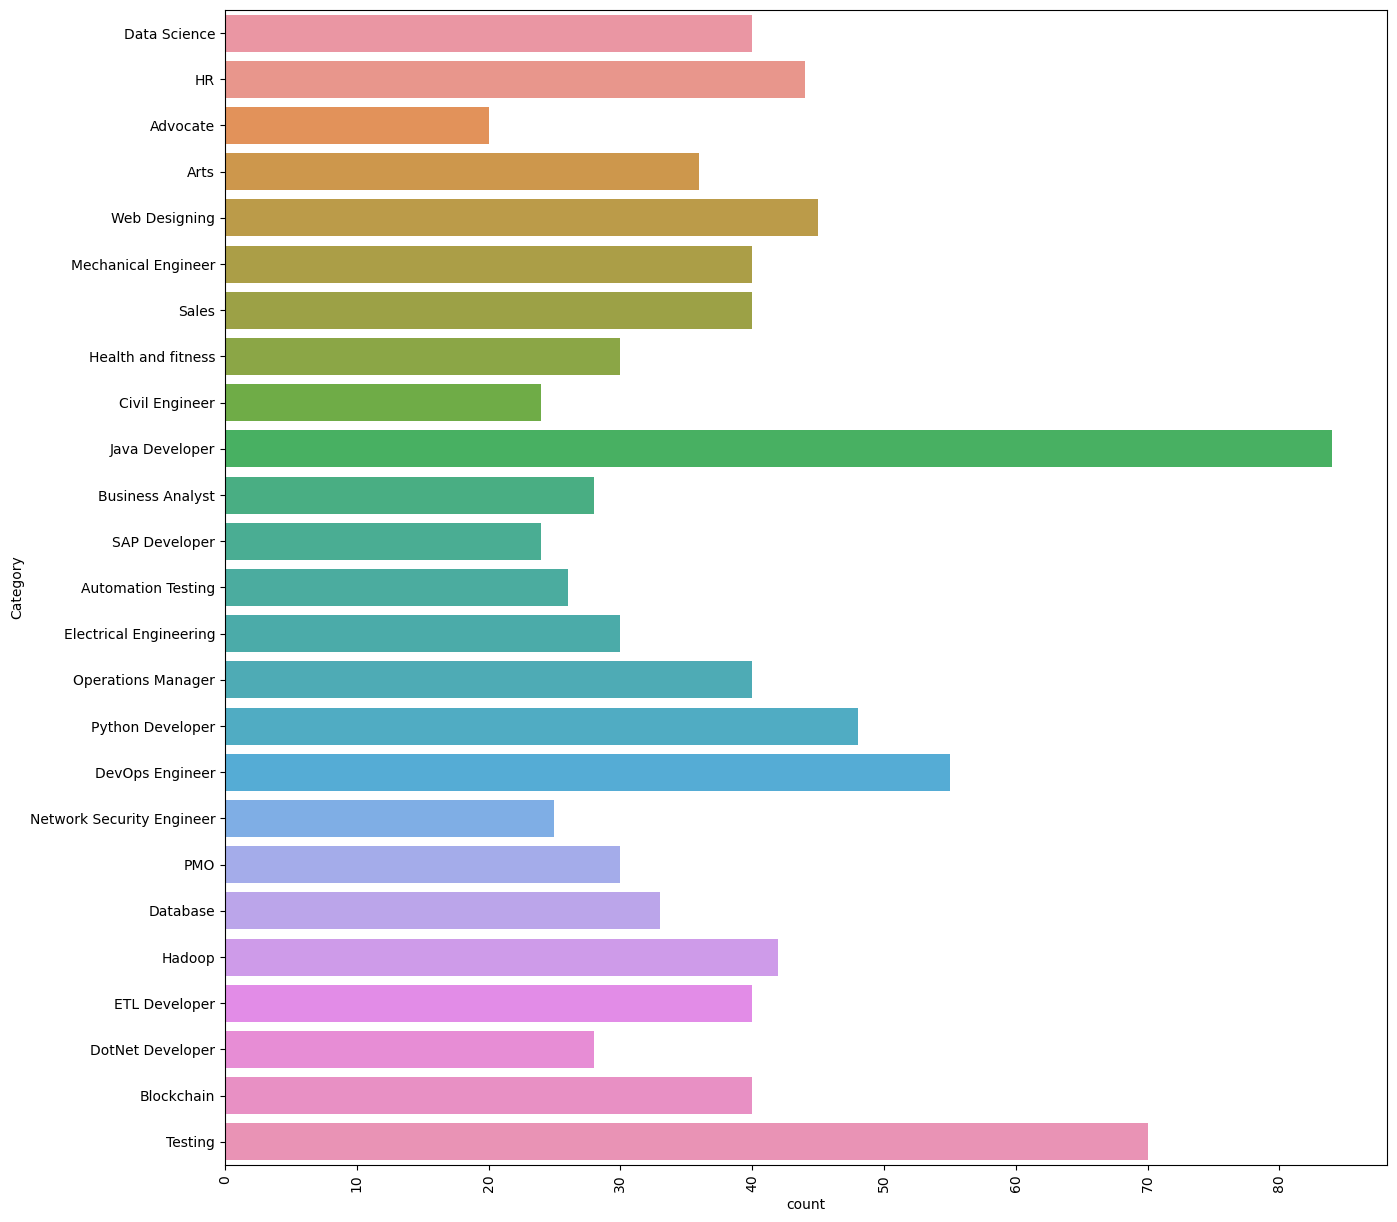

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

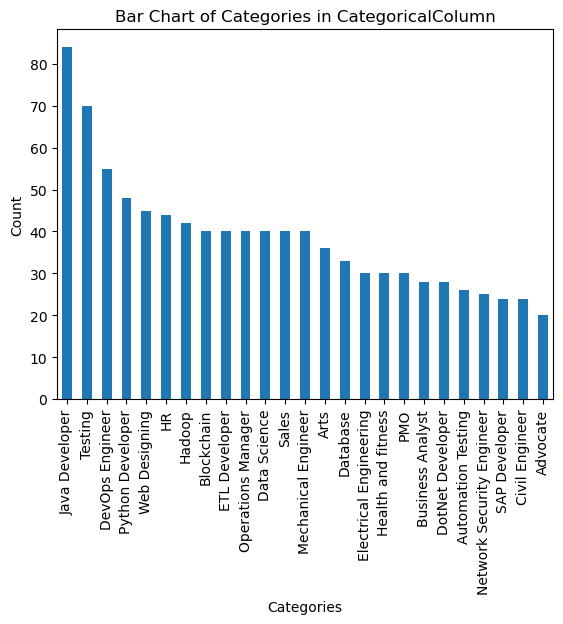

In [13]:
data['Category'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Categories in CategoricalColumn')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [14]:
category_counts = data['Category'].value_counts()


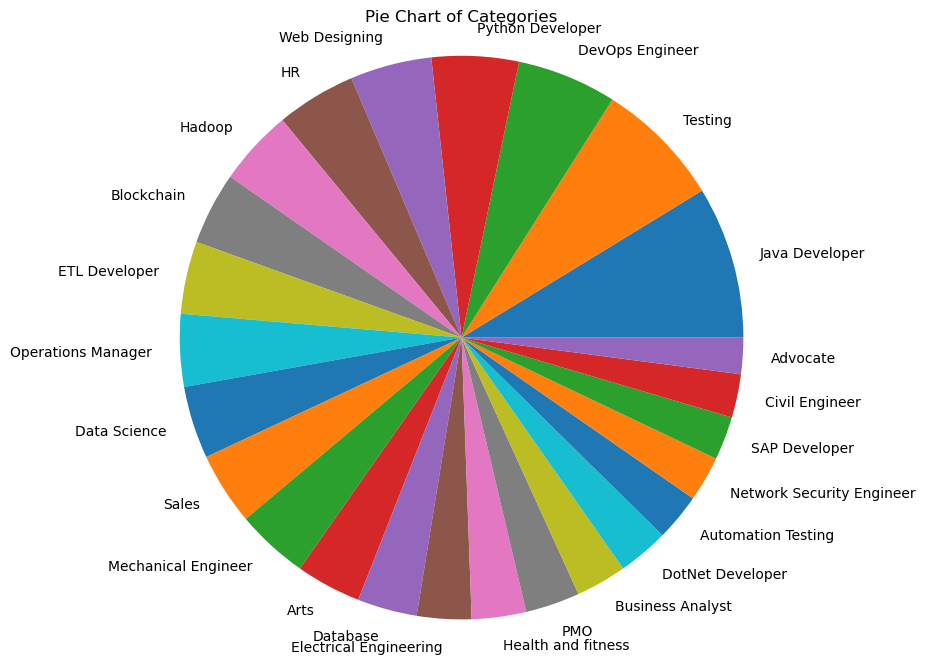

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index)
plt.title('Pie Chart of Categories')
plt.axis('equal') 
plt.show()

# Remove Punctuations

In [16]:
import string

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [19]:
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))
print (data['cleaned_resume'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object


In [20]:
data

Category                                             Resume   len  \
0    Data Science  Skills * Programming Languages: Python (pandas...  4786   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...  1268   
2    Data Science  Areas of Interest Deep Learning, Control Syste...  1871   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...  6995   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   452   
..            ...                                                ...   ...   
957       Testing  Computer Skills: â¢ Proficient in MS office (...  2130   
958       Testing  â Willingness to accept the challenges. â ...  2306   
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...  3319   
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   767   
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...  1955   

                                        cleaned_resume  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas of Interest Deep Learning Control System...  
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4    Education Details MCA YMCAUST Faridabad Haryan...  
..                                                 ...  
957  Computer Skills Proficient in MS office Word B...  
958   Willingness to a ept the challenges Positive ...  
959  PERSONAL SKILLS Quick learner Eagerness to lea...  
960  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...  
961  Skill Set OS Windows XP 7 8 8 1 10 Database MY...  

[962 rows x 4 columns]

In [21]:
data.drop(['Resume','len'],axis=1,inplace=True)

In [22]:
data

Category                                     cleaned_resume
0    Data Science  Skills Programming Languages Python pandas num...
1    Data Science  Education Details May 2013 to May 2017 B E UIT...
2    Data Science  Areas of Interest Deep Learning Control System...
3    Data Science  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Data Science  Education Details MCA YMCAUST Faridabad Haryan...
..            ...                                                ...
957       Testing  Computer Skills Proficient in MS office Word B...
958       Testing   Willingness to a ept the challenges Positive ...
959       Testing  PERSONAL SKILLS Quick learner Eagerness to lea...
960       Testing  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961       Testing  Skill Set OS Windows XP 7 8 8 1 10 Database MY...

[962 rows x 2 columns]

# Remove Stopwords

In [23]:
from nltk.corpus import stopwords

In [24]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [27]:
data['cleaned_resume'] = data['cleaned_resume'].apply(lambda x: remove_stopwords(x))


In [28]:
data

Category                                     cleaned_resume
0    Data Science  Skills Programming Languages Python pandas num...
1    Data Science  Education Details May 2013 May 2017 B E UIT RG...
2    Data Science  Areas Interest Deep Learning Control System De...
3    Data Science  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Data Science  Education Details MCA YMCAUST Faridabad Haryan...
..            ...                                                ...
957       Testing  Computer Skills Proficient MS office Word Basi...
958       Testing  Willingness ept challenges Positive thinking G...
959       Testing  PERSONAL SKILLS Quick learner Eagerness learn ...
960       Testing  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961       Testing  Skill Set OS Windows XP 7 8 8 1 10 Database MY...

[962 rows x 2 columns]

In [29]:
text=data['cleaned_resume']

In [30]:
text

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 May 2017 B E UIT RG...
2      Areas Interest Deep Learning Control System De...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient MS office Word Basi...
958    Willingness ept challenges Positive thinking G...
959    PERSONAL SKILLS Quick learner Eagerness learn ...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object

In [31]:
new_data= ''.join(text)  

In [32]:
new_data

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists elerating review process run anal

# Word tokenize

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
words = word_tokenize(new_data)

In [35]:
words

['Skills',
 'Programming',
 'Languages',
 'Python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'Sql',
 'Java',
 'JavaScript',
 'JQuery',
 'Machine',
 'learning',
 'Regression',
 'SVM',
 'Na',
 'Bayes',
 'KNN',
 'Random',
 'Forest',
 'Decision',
 'Trees',
 'Boosting',
 'techniques',
 'Cluster',
 'Analysis',
 'Word',
 'Embedding',
 'Sentiment',
 'Analysis',
 'Natural',
 'Language',
 'processing',
 'Dimensionality',
 'reduction',
 'Topic',
 'Modelling',
 'LDA',
 'NMF',
 'PCA',
 'Neural',
 'Nets',
 'Database',
 'Visualizations',
 'Mysql',
 'SqlServer',
 'Cassandra',
 'Hbase',
 'ElasticSearch',
 'D3',
 'js',
 'DC',
 'js',
 'Plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'Tableau',
 'Others',
 'Regular',
 'Expression',
 'HTML',
 'CSS',
 'Angular',
 '6',
 'Logstash',
 'Kafka',
 'Python',
 'Flask',
 'Git',
 'Docker',
 'computer',
 'vision',
 'Open',
 'CV',
 'understanding',
 'Deep',
 'learning',
 'Education',
 'Details',
 'Data',
 'Science',
 'Assurance',
 'Associate',

# Most Common Words

In [36]:
wordfreqdist = nltk.FreqDist(words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3224), ('company', 3126), ('Details', 2967), ('description', 2549), ('1', 2134), ('Project', 1808), ('project', 1571), ('6', 1499), ('data', 1420), ('team', 1414), ('Maharashtra', 1385), ('year', 1234), ('Less', 1137), ('January', 1086), ('using', 1041), ('Management', 1010), ('Pune', 1004), ('SQL', 986), ('Skill', 984), ('Ltd', 928), ('management', 927), ('C', 896), ('Engineering', 847), ('Developer', 788), ('Java', 773), ('development', 752), ('monthsCompany', 746), ('2', 746), ('Pvt', 730), ('application', 718), ('System', 715), ('India', 693), ('requirements', 693), ('reports', 689), ('various', 688), ('A', 688), ('business', 684), ('Data', 674), ('The', 672), ('I', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('testing', 634), ('system', 626), ('S', 622), ('work', 620)]


In [37]:
filtered_sentence = ' '.join(words)

In [38]:
print(filtered_sentence)

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists elerating review process run analy

In [39]:
doc=(filtered_sentence)

# Wordcloud

In [40]:
from wordcloud import WordCloud

In [41]:
wordcloud= WordCloud(width=1000,height=800, background_color='black',colormap='Set2',max_words=100).generate(doc)

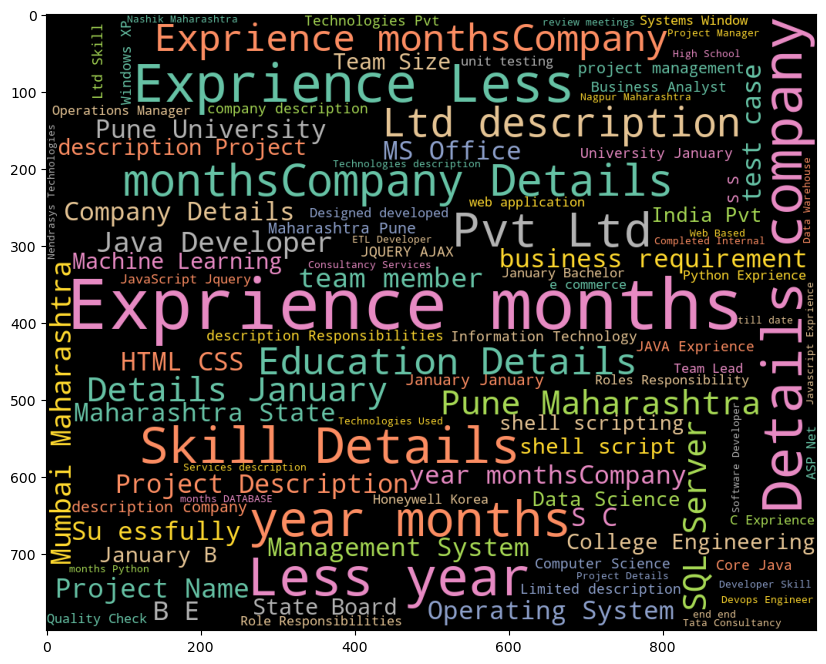

In [42]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.show()

In [43]:
data

Category                                     cleaned_resume
0    Data Science  Skills Programming Languages Python pandas num...
1    Data Science  Education Details May 2013 May 2017 B E UIT RG...
2    Data Science  Areas Interest Deep Learning Control System De...
3    Data Science  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Data Science  Education Details MCA YMCAUST Faridabad Haryan...
..            ...                                                ...
957       Testing  Computer Skills Proficient MS office Word Basi...
958       Testing  Willingness ept challenges Positive thinking G...
959       Testing  PERSONAL SKILLS Quick learner Eagerness learn ...
960       Testing  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961       Testing  Skill Set OS Windows XP 7 8 8 1 10 Database MY...

[962 rows x 2 columns]

# Data Preprocessing

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = data['cleaned_resume'].values
y = data['Category'].values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25)
x_train.shape

(721,)

In [47]:
x_test.shape

(241,)

In [48]:
print(y_train),print(y_test)

['Data Science' 'Business Analyst' 'Sales' 'Blockchain' 'Java Developer'
 'Sales' 'Python Developer' 'Network Security Engineer' 'Hadoop'
 'Health and fitness' 'DevOps Engineer' 'Network Security Engineer'
 'Sales' 'Java Developer' 'Java Developer' 'Python Developer'
 'DevOps Engineer' 'HR' 'Electrical Engineering' 'PMO' 'Data Science'
 'ETL Developer' 'Sales' 'Testing' 'Hadoop' 'DotNet Developer' 'Database'
 'Java Developer' 'Business Analyst' 'Operations Manager' 'Blockchain'
 'Hadoop' 'Network Security Engineer' 'HR' 'PMO' 'Business Analyst'
 'Python Developer' 'Business Analyst' 'Java Developer' 'ETL Developer'
 'Database' 'Mechanical Engineer' 'DevOps Engineer' 'Sales' 'Blockchain'
 'Blockchain' 'DevOps Engineer' 'Sales' 'Web Designing' 'Java Developer'
 'Operations Manager' 'Network Security Engineer' 'Business Analyst'
 'Java Developer' 'Health and fitness' 'Web Designing' 'ETL Developer'
 'Sales' 'Advocate' 'Automation Testing' 'Java Developer' 'Testing'
 'DevOps Engineer' 'Dat

(None, None)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [51]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [52]:
x_train.shape, x_test.shape

((721, 7279), (241, 7279))

In [53]:
print(y_train),print(y_test)

['Data Science' 'Business Analyst' 'Sales' 'Blockchain' 'Java Developer'
 'Sales' 'Python Developer' 'Network Security Engineer' 'Hadoop'
 'Health and fitness' 'DevOps Engineer' 'Network Security Engineer'
 'Sales' 'Java Developer' 'Java Developer' 'Python Developer'
 'DevOps Engineer' 'HR' 'Electrical Engineering' 'PMO' 'Data Science'
 'ETL Developer' 'Sales' 'Testing' 'Hadoop' 'DotNet Developer' 'Database'
 'Java Developer' 'Business Analyst' 'Operations Manager' 'Blockchain'
 'Hadoop' 'Network Security Engineer' 'HR' 'PMO' 'Business Analyst'
 'Python Developer' 'Business Analyst' 'Java Developer' 'ETL Developer'
 'Database' 'Mechanical Engineer' 'DevOps Engineer' 'Sales' 'Blockchain'
 'Blockchain' 'DevOps Engineer' 'Sales' 'Web Designing' 'Java Developer'
 'Operations Manager' 'Network Security Engineer' 'Business Analyst'
 'Java Developer' 'Health and fitness' 'Web Designing' 'ETL Developer'
 'Sales' 'Advocate' 'Automation Testing' 'Java Developer' 'Testing'
 'DevOps Engineer' 'Dat

(None, None)

# Model Building

## KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred1 = model_knn.predict(x_test)

In [56]:
y_pred1

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'DotNet Developer',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [57]:
accuracy_score(y_test,y_pred1)

0.970954356846473

In [58]:
print(classification_report(y_test,y_pred1))

                           precision    recall  f1-score   support

                 Advocate       1.00      0.67      0.80         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      0.80      0.89         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      0.73      0.84        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       0.89      1.00      0.94         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       0.85      1.00      0.92        11
                   Hadoop       1.00      1.00      1.00     

## Decision Tree Classifier

In [59]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred2 = model_DT.predict(x_test)

In [60]:
y_pred2

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [61]:
accuracy_score(y_test,y_pred2)

0.995850622406639

In [62]:
print(classification_report(y_test,y_pred2))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [63]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred3 = model_RF.predict(x_test)

In [64]:
y_pred3

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [65]:
accuracy_score(y_test,y_pred3)

0.995850622406639

In [66]:
print(classification_report(y_test,y_pred3))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

## Support Vector Classifier

In [67]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred4 = model_svm.predict(x_test)

In [68]:
y_pred4

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst', 'Java Developer',
       'Sales', 'Business Analyst', 'Mechanical Engineer', 'Testing',
       'DotNet Developer', 'Blockchain', 'Civil Engineer', 'Hadoop',
       'Blockchain', 'Blockchain', 'Civil Engineer', 'Arts', 'Sales',
       'Arts', 'Java Developer', 'Java Developer', 'Java Developer',
       'DevOps Engineer', 'Database', 'Java Developer', 'Hadoop',
       'Automation Testing', 'Mechanical Engineer', 'Database',
       'Operations Manager', 'Automation Testing', 'Java Developer',
       'Arts', 'Arts', 'DevOps Engineer', 'PMO', 'Testing',
       'Operations Manager', 'Python Developer', 'Data Science',
       'Mechanical Engineer', 'Automation Testing', 'Mechanical Engineer',
       'Java Developer', 'HR', 'Blockchain', 'Automation Testing',
       'Java Developer', 'Operations Manager', 'Database',
       'Web Designing', 'Sales', 'Mechanical Engineer',
 

In [69]:
accuracy_score(y_test,y_pred4)

0.979253112033195

In [70]:
print(classification_report(y_test,y_pred4))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      0.50      0.67         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

## Logistic Regression

In [71]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred5 = model_lgr.predict(x_test)

In [72]:
y_pred5

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [73]:
accuracy_score(y_test,y_pred5)

0.995850622406639

In [74]:
print(classification_report(y_test,y_pred5))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

## Bagging Classifier

In [75]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred6 = model_bagg.predict(x_test)

In [76]:
y_pred6

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'HR', 'DotNet Developer', 'Sales',
       'Business Analyst', 'Mechanical Engineer', 'Testing',
       'DotNet Developer', 'Blockchain', 'Civil Engineer', 'Hadoop',
       'Blockchain', 'Blockchain', 'Civil Engineer', 'Arts', 'Sales',
       'Arts', 'Java Developer', 'Java Developer', 'Java Developer',
       'DevOps Engineer', 'Database', 'Java Developer', 'Hadoop',
       'Automation Testing', 'Mechanical Engineer', 'Database',
       'Operations Manager', 'Automation Testing', 'Java Developer',
       'Arts', 'Arts', 'DevOps Engineer', 'PMO', 'Testing',
       'Operations Manager', 'Python Developer', 'HR',
       'Mechanical Engineer', 'Automation Testing', 'Mechanical Engineer',
       'Java Developer', 'HR', 'Blockchain', 'Automation Testing',
       'Java Developer', 'Operations Manager', 'Database',
       'Web Designing', 'Sales', 'Mechanical Engineer',
       'Mechanical Engi

In [77]:
accuracy_score(y_test,y_pred6)

0.946058091286307

In [78]:
print(classification_report(y_test,y_pred6))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.90      0.95        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      0.80      0.89         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      0.45      0.62        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       0.58      1.00      0.73        11
                   Hadoop       1.00      1.00      1.00     

## Gradientboost Classifier

In [79]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred8 = model_GradientBoost.predict(x_test)

In [80]:
y_pred8

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [81]:
accuracy_score(y_test,y_pred8)

0.995850622406639

In [82]:
print(classification_report(y_test,y_pred8))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

## Multinomial Naive bayes

In [83]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred9 = model_NB.predict(x_test)

In [84]:
y_pred9

array(['Automation Testing', 'Hadoop', 'Advocate', 'Blockchain',
       'Mechanical Engineer', 'PMO', 'Business Analyst',
       'DotNet Developer', 'Sales', 'Business Analyst',
       'Mechanical Engineer', 'Testing', 'DotNet Developer', 'Blockchain',
       'Civil Engineer', 'Hadoop', 'Blockchain', 'Blockchain',
       'Civil Engineer', 'Arts', 'Sales', 'Arts', 'Java Developer',
       'Java Developer', 'Java Developer', 'DevOps Engineer', 'Database',
       'Java Developer', 'Hadoop', 'Automation Testing',
       'Mechanical Engineer', 'Database', 'Operations Manager',
       'Automation Testing', 'Java Developer', 'Arts', 'Arts',
       'DevOps Engineer', 'PMO', 'Testing', 'Operations Manager',
       'Python Developer', 'Data Science', 'Mechanical Engineer',
       'Automation Testing', 'Mechanical Engineer', 'Java Developer',
       'HR', 'Blockchain', 'Automation Testing', 'Java Developer',
       'Operations Manager', 'Database', 'Web Designing', 'Sales',
       'Mechanical Eng

In [85]:
accuracy_score(y_test,y_pred9)

0.991701244813278

In [86]:
print(classification_report(y_test,y_pred9))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.90      0.95        10
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.95      0.97        19
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

# Model Evaluation

In [132]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Accuracy_score":[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6),accuracy_score(y_test,y_pred8),accuracy_score(y_test,y_pred9)]}

In [133]:
table = pd.DataFrame(Evaluation)
table

Models  Accuracy_score
0                KNN Classifier        0.970954
1       DecisionTree Classifier        0.995851
2       RandomForest Classifier        0.995851
3                SVM Classifier        0.979253
4           Logistic Regression        0.995851
5            Bagging Classifier        0.946058
6  Gradient Boosting Classifier        0.995851
7        Naive Bayes Classifier        0.991701